In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy
sy.init_printing(use_latex=True)
import numpy as np
import math
import scipy as sc
from vpython import *

In [252]:
sphere()

# 1. Experimentelle Daten

# (a)

Führen Sie das Phyhox-Fahrstuhl Experiment durch und stellen sie die Daten für Ort, Geschwindigkeit und Beschleunigung als Funktion der Zeit mit matplotlib graphisch dar. Mit welchen Funktionen können die Daten beschrieben werden? Simulieren sie die Bewegung mit vpython oder pyplay

In [253]:
#pd.read_excel("\D:\Dokumente\Uni\6.Semester\Modellbildung und Simulation\Aufgabe 1\phyphoxTestdatenFahrstuhl.xls")
experiment = pd.read_csv("Pressure and velocity.csv", ",")
experiment_beschleunigung = pd.read_csv("Acceleration.csv", ",")

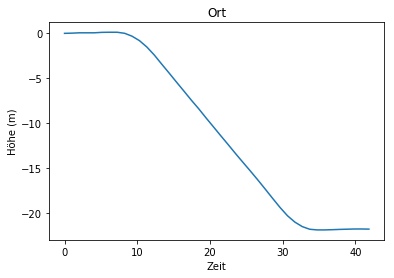

In [254]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Ort')
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Höhe (m)')
ax1.plot(experiment.values[:,0], experiment.values[:,2])
plt.show()

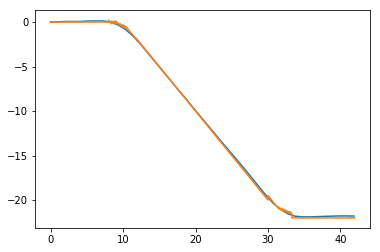

In [255]:
def height(x):
    if x < 8:
        return 0.0
    elif x < 8.4:
        return 8.2-x
    elif x < 8.7:
        return 8.5 - x
    elif x < 9:
        return 8.8 -x
    elif x < 9.3:
        return 9.1-x
    elif x < 9.6:
        return 9.2-x
    elif x < 10:
        return 9.4-x
    elif x < 10.3:
        return 9.7-x
    elif x < 10.6:
        return 9.85-x
    elif x < 11.8:
        return 9.9-x
    elif x < 30:
        return 10-x
    elif x < 31.5:
        return 10.5-x
    elif x < 31.8:
        return 10.7-x
    elif x < 32.1:
        return 10.9-x
    elif x < 32.4:
        return 11.1-x
    elif x < 32.7:
        return 11.3-x
    elif x < 32.9:
        return 11.45-x
    elif x < 33.1:
        return 11.6-x
    elif x < 33.3:
        return 11.75-x
    elif x < 42:
        return -22
    
x = np.arange(0,45, 0.01)
y = [height(xs) for xs in x]
plt.plot(experiment.values[:,0], experiment.values[:,2])
plt.plot(x,y)

In [256]:
# funktion aus python die polynom zurück gibt
np.polyfit(experiment.values[:,0], experiment.values[:,2], deg=3)

array([ 0.00126955, -0.07983813,  0.63045598, -0.70123562])

[ 3.43080136e-13 -3.73582796e-12 -6.47703595e-09  6.88877633e-07
 -3.22524522e-05  8.09953174e-04 -1.10851866e-02  7.57536369e-02
 -2.32271565e-01  2.65352663e-01 -1.81583159e-02]


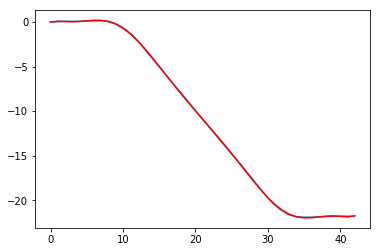

In [257]:
ort = np.polyfit(experiment.values[:,0], experiment.values[:,2], deg=10)
x = range(0, 43)
print(ort)
y = np.polyval(ort, x)
plt.plot(experiment.values[:,0], experiment.values[:,2])
plt.plot(x,y, 'r')
#x2 = range(0,43)
#y2= [hoehe(xs) for xs in x2]
#plt.plot(x2, y2, 'r')
#besch = sc.diff(ort)
#ydot = np.polyval(besch, x)
#plt.plot(x, ydot)

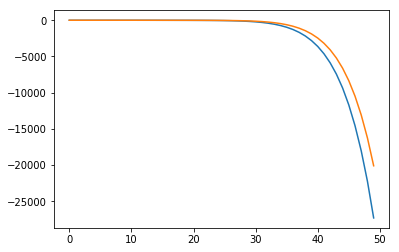

In [258]:
# geschwindigkeit (ableitung ort) du brauchst ein polynom um so ableiten zu können
gesch = sc.diff(ort)
x = range(0, 50)
ydot = np.polyval(gesch, x)
plt.plot(x, ydot)
#beschleunigung
besch = sc.diff(gesch)
yddot = np.polyval(besch, x)
plt.plot(x, yddot)

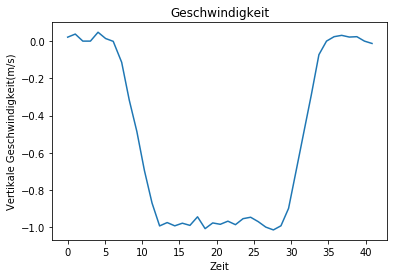

In [259]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title('Geschwindigkeit')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Vertikale Geschwindigkeit(m/s)')
ax2.plot(experiment.values[:,0], experiment.values[:,4])

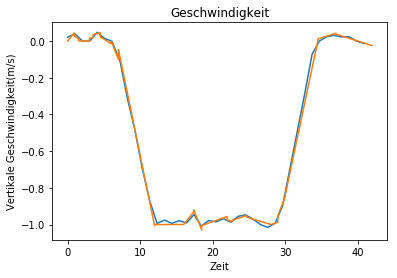

In [260]:
def speed(x):
    if x < 0.9:
        return x/20
    elif x < 1.5:
        return 0.05-x/40
    elif x < 3:
        return 0
    elif x < 3.5:
        return x/200
    elif x < 4.5:
        return x/100
    elif x < 6:
        return 0.01-(x-5)/40
    elif x < 7:
        return 0.6+-x/10
    elif x < 12:
        return 1.3-x/5.2
    elif x < 16:
        return -1
    elif x < 17.4:
        return (x/20)-1.8
    elif x < 18.5:
        return (-x/10)+0.82
    elif x < 22:
        return x/70-1.27
    elif x < 22.7:
        return -x/80-0.7
    elif x < 24.7:
        return x/80-1.26
    elif x < 28:
        return -x/80-0.65
    elif x < 29:
        return x/80-1.35
    elif x < 30:
        return x/10-3.85
    elif x < 34.5:
        return x/5.35-6.45
    elif x < 37:
        return x/80-0.42
    elif x < 42:
        return -x/80+0.5
    
        
        
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title('Geschwindigkeit')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Vertikale Geschwindigkeit(m/s)')
ax2.plot(experiment.values[:,0], experiment.values[:,4])

x = np.arange(0,45, 0.01)
y = [speed(xs) for xs in x]
ax2.plot(x,y)

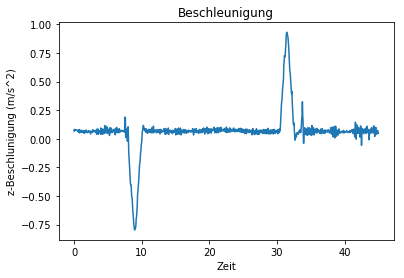

In [261]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_title('Beschleunigung')
ax3.set_xlabel('Zeit')
ax3.set_ylabel('z-Beschlunigung (m/s^2)')
ax3.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.show()

31.46377846 0.931424996


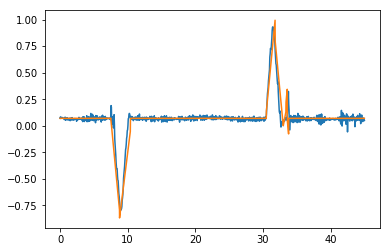

In [262]:
def accel(x):
    if x < 7.5:
        return 0.07
    elif x < 8.8:
        return -0.669*x+5.089
    elif x < 10.4:
        return 0.512*x-5.373
    elif x < 30.5:
        return 0.07
    elif x < 31.8:
        return x/1.5-20.2
    elif x < 33:
        return -x/1.5+22
    elif x < 33.4:
        return x/3-11
    elif x < 33.6:
        return x/1.5-22.05
    elif x < 33.8:
        return -x/1.5+22.45
    else:
        return 0.07
#zum schluss noch ein bisschen verzerrung rein bringen oder passt das so?    
x = np.arange(0,45, 0.01)
y = [accel(xs) for xs in x]
plt.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.plot(x,y)
print(experiment_beschleunigung.values[630,0], experiment_beschleunigung.values[630,1])

In [263]:
experiment.values[1,0], experiment.values[1,2]
experiment.values[2,0], experiment.values[2,2]
experiment.values[3,0], experiment.values[3,2]


## (b)

Welches Polynom beschreibt am bested die Daten Unbekannt.txt. Verwenden Sie pylab.polyfit


In [264]:
poly = np.loadtxt("UnbekannteDaten.txt", skiprows=1)

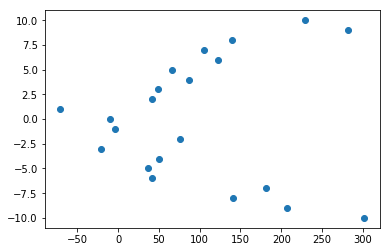

In [265]:
plt.plot(poly[:,0], poly[:,1], 'o')

In [266]:
p = np.polyfit(poly[:,0], poly[:,1], deg=5)

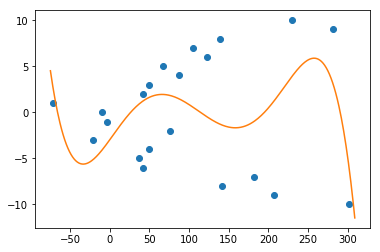

In [267]:
x = range(-75,310)
y = np.polyval(p,x)
plt.plot(poly[:,0], poly[:,1], 'o')
plt.plot(x,y)
plt.show()


### (c)

Es werden verschiedene Massen an eine vertikale Feder gehängt und die Federlängen bestimmt die Daten befinden sich im File DatenFeder.txt. Führen Sie eine lineare Regession mit pylab.polyfit durch und bestimmen Sie die Federkonstanten für eine lineare ($F = Dx$) und eine kubische Funktion ($F = D_1x + D_2x^2 + D_3x^3$)

In [268]:
feder = np.loadtxt("DatenFeder.txt", skiprows=1)

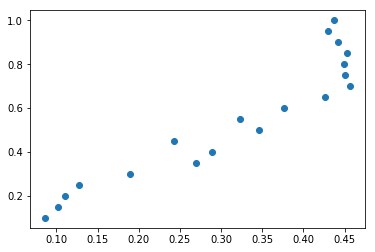

In [269]:
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [270]:
linear = np.polyfit(feder[:,0], feder[:,1], deg=1)

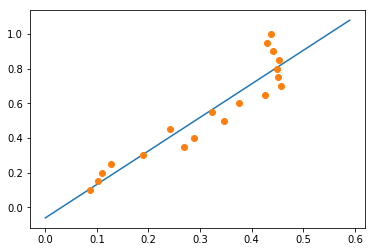

In [271]:
x = np.arange(0, 0.6, 0.01)
y = [linear[0]*xs + linear[1] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [272]:
kubic = np.polyfit(feder[:,0], feder[:,1], deg=4)

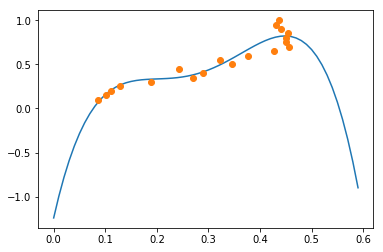

In [273]:
x = np.arange(0, 0.6, 0.01)
y = [kubic[0]*xs**4 + kubic[1]*xs**3 + kubic[2]*xs**2 + kubic[3]*xs + kubic[4] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()


### (d)

Ein kleiner Ball wird mit einer bestimmten Anfangsgeschwindigkeit unter einem bestimmten Abwurfwinkel geworfen und die $x$- und $y$-Position zu verschiedenen Zeitpunkten mit einer Videoanalyse gemessen (DatenSchWurf.txt). Führen Sie eine lineare Regression mit pylab polyfit durch. Schätzen sie die Flugzeit und Geschwindigkeit des Balles ab.


In [274]:
wurf = np.loadtxt("DatenSchWurf.txt", skiprows=1)

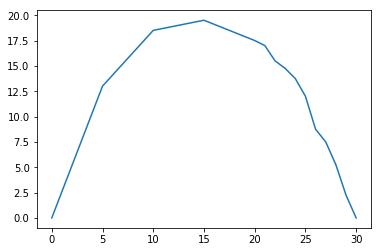

In [275]:
distance = wurf[:,0]
height = wurf [:,1]
plt.plot(distance, height)

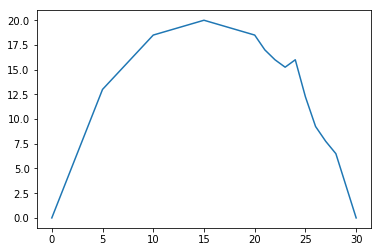

In [276]:
height2 = wurf[:,2]
plt.plot(distance, height2)

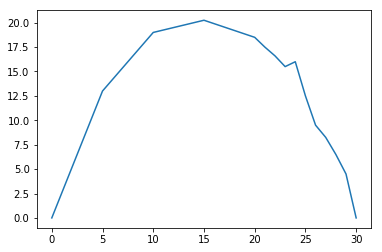

In [277]:
height3 = wurf[:,3]
plt.plot(distance, height3)

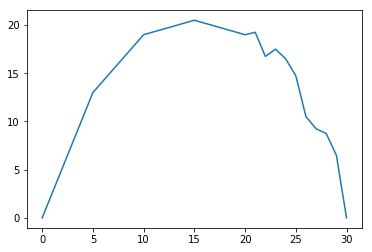

In [278]:
height4 = wurf[:,4]
plt.plot(distance, height4)

In [279]:
distance = wurf[:,0]
height = wurf[:,1:4]
c = np.polyfit(distance, height, deg=2)
c

array([[-0.08906891, -0.09014064, -0.09041047],
       [ 2.64889548,  2.71009403,  2.72935024],
       [ 0.71048819,  0.52352761,  0.55393343]])

-0.09041047350266546 2.7293502351834444 0.5539334274066994


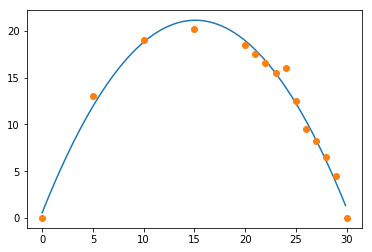

In [280]:
x = np.arange(0, 30, 0.1)
print(c[0,2],c[1,2],c[2,2])
y = [c[0,2]*xs**2 + c[1,2]*xs + c[2,2] for xs in x]
plt.plot(x,y)
plt.plot(wurf[:,0], wurf[:,3], 'o')
plt.show()

# 2. Wurfbewegung


## (a)

Ein Objekt wird von $x = x_0$ mit einer Anfangsgeschwindigkeit $v_0$ und einem Anfangswinkel $\theta_0$ abgeworfen. Die Reibung kann vernachlässtigt werden. Die einzige Kraft ist die Gravitationskraft in $y$-Richtung.



### i.

Lösen Sie die Differentialgleichungen: $\ddot{x} = 0, \ddot{y} = -g$ numerisch und vergleichen Sie das Ergebnis mit der analytischen Lösungen. Berechnen Sie die Wurfweite als Funktion des Abwurfwinkels.


In [281]:
# g Variable: Gravitationskraft
#g = 9.81
g = sy.symbols('g')

Anfangsgeschwindigkeit(v_x0 bzw. x') in x-Richtung in Abhängigkeit der Anfangsgeschwindigkeit und des Abwurfwinkels


Anfangsgeschwindigkeit(v_y0 bzw. y') in y-Richtung in Abhängigkeit der Anfangsgeschwindigkeit und des Abwurfwinkels


y'' Ausgedrückt durch d/dt y'


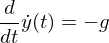

Allgemeine Lösung für y'


Anfangsbedingung für y'


'Eingesetzt'

'Lösung für Konstante'

"Lösung von y' mit Anfangsbedingung"

"y' dargestellt durch d/dt y"

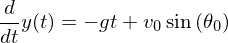

'Allgemeine Lösung für y'

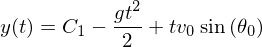

'Anfangesbedingung für y'

'Eingesetzt '

'Lösung für Konstante'

'Lösung von y mit Anfangsbedingung'

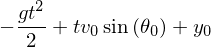

In [282]:
# analytische Lösung des DGL
t, y0, v0, theta0 = sy.symbols('t, y0, v0, theta0')
y, dy = sy.symbols('y, \dot{y}', function=True)
vx0 = v0*sy.cos(theta0)
vy0 = v0*sy.sin(theta0)
print("Anfangsgeschwindigkeit(v_x0 bzw. x') in x-Richtung in Abhängigkeit der Anfangsgeschwindigkeit und des Abwurfwinkels")
display(vx0)
print("Anfangsgeschwindigkeit(v_y0 bzw. y') in y-Richtung in Abhängigkeit der Anfangsgeschwindigkeit und des Abwurfwinkels")
display(vy0)

eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), -g)
print("y'' Ausgedrückt durch d/dt y'")
display(eq_dy)
sol_dy = sy.dsolve(eq_dy)
print('Allgemeine Lösung für y\'')
display(sol_dy)
ics = {dy(0): vy0}
print("Anfangsbedingung für y\'")
display(ics)
C_dy_eq = sy.Eq(sol_dy.lhs.subs(t,0).subs(ics), sol_dy.rhs.subs(t,0))
display('Eingesetzt', C_dy_eq)
C_dy_sol = sy.solve(C_dy_eq)
display('Lösung für Konstante', C_dy_sol)
dy = sol_dy.subs(C_dy_sol[0])
display('Lösung von y\' mit Anfangsbedingung', dy)
eq_y = sy.Eq(sy.Derivative(y(t),t , 1), dy.rhs)
display('y\' dargestellt durch d/dt y', eq_y)
sol_y = sy.dsolve(eq_y)
display('Allgemeine Lösung für y', sol_y)
ics = {y(0): y0}
display('Anfangesbedingung für y', ics)
C_y_eq = sy.Eq(sol_y.lhs.subs(t, 0).subs(ics), sol_y.rhs.subs(t,0))
display('Eingesetzt ', C_y_eq)
C_y_sol = sy.solve(C_y_eq)
display('Lösung für Konstante', C_y_sol)
if isinstance(C_y_sol[0], dict):
    y = sol_y.subs(C_y_sol[0]).rhs
else:
    y = sol_y.subs({C_y_eq.rhs : C_y_eq.lhs}).rhs
display('Lösung von y mit Anfangsbedingung', y)

'dot{x} Gleichung'

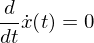

'Lösung für dot{x} '

'Anfangsbedingung'

'Eingesetzt und nach Konstante aufgelöst'

'Lösung für Konstante'

'Konstante in dot{x} eingesetzt'

'Gleichung für x'

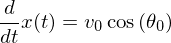

'Lösung für x'

'Anfangsbedingung'

'Eingesetzt und nach Konstante aufglöst'

'Lösung für Konstante'

'Lösung für x mit Konstante eingesetzt: '

In [283]:
t, x0, v0, theta0, x_v = sy.symbols('t, x0, v0, theta0, x_v')
x, dx = sy.symbols('x, \dot{x}', function=True)
eq_dx = sy.Eq(sy.Derivative(dx(t), t, 1), 0)
display('dot{x} Gleichung', eq_dx)
sol_dx = sy.dsolve(eq_dx)
display('Lösung für dot{x} ', sol_dx)
ics = {dx(0): vx0}
display('Anfangsbedingung', ics)
C_dx_eq = sy.Eq(sol_dx.lhs.subs(t,0).subs(ics), sol_dx.rhs.subs(t,0))
display('Eingesetzt und nach Konstante aufgelöst', C_dx_eq)
C_dx_sol = sy.solve(C_dx_eq)
display('Lösung für Konstante', C_dx_sol)
dx = sol_dx.subs(C_dx_sol[0])
display('Konstante in dot{x} eingesetzt', dx)
eq_x = sy.Eq(sy.Derivative(x(t),t , 1), dx.rhs)
display('Gleichung für x', eq_x)
sol_x = sy.dsolve(eq_x)
display('Lösung für x', sol_x)
ics = {x(0): x0}
display('Anfangsbedingung', ics)
C_x_eq = sy.Eq(sol_x.lhs.subs(t, 0).subs(ics), sol_x.rhs.subs(t,0))
display('Eingesetzt und nach Konstante aufglöst', C_x_eq)
C_x_sol = sy.solve(C_x_eq)
display('Lösung für Konstante', C_x_sol)
x = sy.Eq(x_v, sol_x.subs(C_x_sol[0]).rhs)
display('Lösung für x mit Konstante eingesetzt: ', x)

'x nach t aufgelöst: '

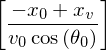

'alte y Lösung: '

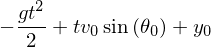

't in abhängigkeit von x eingesetzt:'

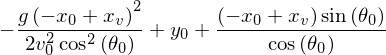

'vereinfacht:'

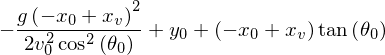

In [284]:
t_x = sy.solve(x, t)
display('x nach t aufgelöst: ', t_x)
display('alte y Lösung: ', y)
y_v = y.subs({t: t_x[0]})
display('t in abhängigkeit von x eingesetzt:', y_v)
#y_v = sy.simplify(y_v)
y_v = sy.trigsimp(y_v)
display('vereinfacht:', y_v)

In [285]:
x0_val = 0
v0_val = 20
theta0_val = math.radians(45)
y0_val = 0
g_val = 9.81

#### Herleitung der Funktion der Wurfweite in Abhängigkeit des Abwurfwinkels
Symmetrische Funktion => $y(t)$ erreicht seinen Hochpunkt nach der hälfte der Zeit.
Berechnen der Wurfweite

1) Hochpunkt von $y(t)$ berechnen ($\dot{y}(t)=0$) und nach $t$ (der Zeit auflösen)

2) $2*t_H$ ($t_H$: Lösung aus 1)) in $x(t)$ einsetzen

't_H'

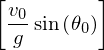

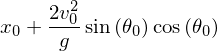

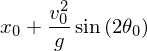

In [366]:
t = sy.symbols('t')
display(dy)
höhepunkt = sy.Eq(0, dy.rhs)
display(höhepunkt)
t_H = sy.solve(höhepunkt, t)
display('t_H', t_H)
display(x)
max_x = x.rhs.subs(t, 2*t_H[0])
display(max_x)
display(sy.simplify(max_x))

In [287]:
def x_max(theta0):
    print('XMAX')
    print('x0', x0_val)
    print('v0', v0_val)
    print('theta0', theta0)
    print('g_val', g_val)
    return x0_val + ((v0_val)**2*sy.sin(2*theta0))/g_val

In [308]:
def anLsg(x0_val, y0_val, v0_val, theta0_val):
    display('y ohne subs:', y_v)
    #print('ANLSG')
    #print('x0', x0_val)
    #print('v0', v0_val)
    #print('theta0', theta0_val)
    #print('g_val', g_val)
    y_val = y_v.subs({x0: x0_val, y0: y0_val, v0: v0_val, theta0: theta0_val, g: g_val})
    #display('y: ', y_val)
    xs = np.arange(x0_val, x_max(theta0_val), 0.07)
    display('max x:', x_max(theta0_val))
    #for x_v in xs:
    y_list = []
    for x_i in xs:
        y_i = y_val.subs({x_v: x_i})
        y_list.append(y_i)
    return xs, y_list

'y ohne subs:'

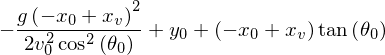

ANLSG
x0 0
v0 20
theta0 0.7853981633974483
g_val 9.81


'y: '

XMAX
x0 0
v0 20
theta0 0.7853981633974483
g_val 9.81
XMAX
x0 0
v0 20
theta0 0.7853981633974483
g_val 9.81


'max x:'

'y ohne subs:'

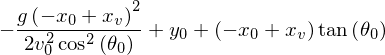

ANLSG
x0 0
v0 20
theta0 1.3962634015954636
g_val 9.81


'y: '

XMAX
x0 0
v0 20
theta0 1.3962634015954636
g_val 9.81
XMAX
x0 0
v0 20
theta0 1.3962634015954636
g_val 9.81


'max x:'

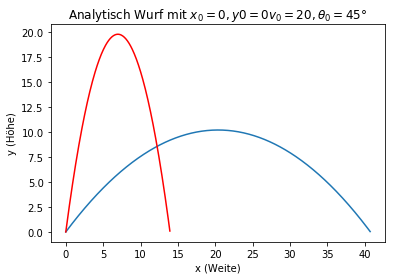

In [289]:
x0_val = 0
theta0_val = math.radians(45)
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a)
plt.title(r'Analytisch Wurf mit $x_0=0, y0=0 v_0=20, \theta_0=45°$')
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
x0_val = 0
theta0_val = math.radians(80)
x_a_2, y_a_2 = anLsg(x0_val, 0, 20, theta0_val)
plt.plot(x_a_2, y_a_2, 'r')
plt.show()

In [290]:
t_start = 0
h = 0.5

In [291]:
ddx = 0
ddy = -g_val

In [292]:
def t_max(v0, theta0):
    return (v0*sy.sin(theta0))/g_val

In [293]:
def y_max(v0, theta0, y0):
    t_m = t_max(v0,theta0)
    return y0+v0*sy.sin(theta0)*t_m-(g_val*t_m**2)/2

In [294]:
def euler(var, h, dvar):
    return var + h*dvar

In [350]:
def numLsg(theta0, v0, y0, x0, h):
    t_max = (v0*sy.sin(theta0))/g_val
    t_end = 2*t_max # symmetrisch
    print(t_max)
    vx0_e = v0*sy.cos(theta0)
    vy0_e = v0*sy.sin(theta0)
    #sy.pprint(vx0_e)
    y0_val = y0
    vx_n = vx0_e
    x_n = x0_val
    x_e = [x0_val]
    y_n = y0_val
    vy_n = vy0_e
    y_e = [y0_val]
    display(t_end)
    for ts in np.arange(t_start, t_end, h):
        vy_np1 = euler(vy_n, h, ddy)
        y_np1 = euler(y_n, h, vy_np1)
        vy_n = vy_np1
        y_n = y_np1
        vx_np1 = euler(vx_n, h, ddx)
        x_np1 = euler(x_n, h, vx_np1)
        if y_np1 >= y0_val:
            y_e.append(y_np1)
            x_e.append(x_np1)
        else:
            y_e.append(y_np1)
            x_e.append(x_np1)
            break
        vx_n = vx_np1
        x_n = x_np1
    return x_e, y_e
#sy.pprint(x_e)

2.00776300308299


2.00776300308299


2.00776300308299


2.00776300308299


'y ohne subs:'

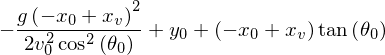

ANLSG
x0 0
v0 20
theta0 1.3962634015954636
g_val 9.81


'y: '

XMAX
x0 0
v0 20
theta0 1.3962634015954636
g_val 9.81
XMAX
x0 0
v0 20
theta0 1.3962634015954636
g_val 9.81


'max x:'

XMAX
x0 0
v0 20
theta0 1.3962634015954636
g_val 9.81


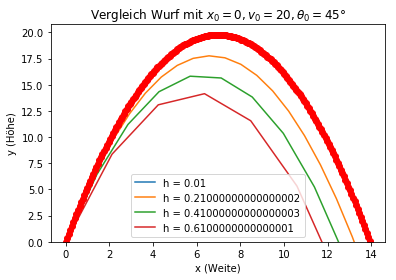

In [300]:
plots = []
names = []
for h_val in np.arange(0.01, 0.7, 0.2):
    x_e, y_e = numLsg(theta0_val, v0_val, y0_val, x0_val, h=h_val)
    l, = plt.plot(x_e, y_e)
    plots.append(l,)
    names.append('h = '+ str(h_val))
x_a, y_a = anLsg(x0_val, y0_val, v0_val, theta0_val)
plt.plot(x_a, y_a, 'ro')
#plt.plot(x_e, y_e)
plt.title(r'Vergleich Wurf mit $x_0=0, v_0=20, \theta_0=45°$')
plt.xlabel('x (Weite)')
plt.ylabel('y (Höhe)')
plt.legend(plots, names)
x_m = float(x_max(theta0_val))
y_m = float(y_max(v0_val, theta0_val, y0_val))
plt.axis([x0_val-(x_m/20), x_m+(x_m/20), y0_val, y_m+(y_m/20)])
plt.show()


### ii.

Formulieren Sie die Aufgabe als Randwertproblem für einen senkrechten Wurf ($\theta_0 = \pi$). Bestimmen Sie die Anfangsgeschwindigkeit bei vorgegebener Wurfhöhe mit Hilfe einer binären Suche.


In [385]:
TOL = 1e-5
x0_val = 0
theta0_val = math.pi/2
display(theta0_val)
y0_val = 0


In [378]:
def numLsg(theta0, v0, y0, x0, h):
    t_max = 100
    t_end = 2*t_max # symmetrisch
    print(t_max)
    vx0_e = v0*sy.cos(theta0)
    print('anfangs gesch in x richtung:', vx0_e)
    vy0_e = v0*sy.sin(theta0)
    print('anfangs gesch in y richtung:', vy0_e)
    #sy.pprint(vx0_e)
    y0_val = y0
    vx_n = vx0_e
    x_n = x0_val
    x_e = [x0_val]
    y_n = y0_val
    vy_n = vy0_e
    y_e = [y0_val]
    display(t_end)
    for ts in np.arange(t_start, t_end, h):
        vy_np1 = euler(vy_n, h, ddy)
        y_np1 = euler(y_n, h, vy_np1)
        vy_n = vy_np1
        y_n = y_np1
        vx_np1 = euler(vx_n, h, ddx)
        x_np1 = euler(x_n, h, vx_np1)
        if y_np1 >= y0_val:
            y_e.append(y_np1)
            x_e.append(x_np1)
        else:
            y_e.append(y_np1)
            print(y_np1)
            x_e.append(x_np1)
            break
        vx_n = vx_np1
        x_n = x_np1
    return x_e, y_e

In [431]:
def t_max(v0, theta0):
    #print(v0, theta0)
    return (v0*sy.sin(theta0))/g_val

In [432]:
def y_max(v0, theta0, y0):
    #print(theta0)
    t_m = t_max(v0, theta0)
    #print(t_m)
    return y0+v0*sy.sin(theta0)*t_m-(g_val*t_m**2)/2

In [436]:
def BVP(y_h, v0=100):
    #print(theta0_val)
    v0_val = v0/2
    step = v0_val/2
    y_maximum = y_max(v0_val, theta0_val, y0_val)
    while abs(y_maximum-y_h) > TOL:
        #print('maximum y', y_maximum)
        #print('step', step)
        if y_maximum-y_h < 0:
            #print('Kleiner')
            v0_val = v0_val + step
            #print('v0', v0_val)
            y_maximum = y_max(v0_val, theta0_val, y0_val)
        elif y_maximum-y_h > 0:
            #print('größer')
            #print('v0', v0_val)
            v0_val = v0_val - step
            y_maximum = y_max(v0_val, theta0_val, y0_val)
        step = step/2
    return y_maximum, v0_val

In [441]:
y_l, v0_val = BVP(1.1)
print(y_l)
print(v0_val)

1.09999553778992
4.645633697509766



## (b)

Ein kugelförmiges Objekt wird von einem Punkt $x_0$ unter einem Winkel $\theta_0$ abgeworfen. Es wirkt eine Reibungskraft entgegen der Bewegungsrichtung mit dem Bertag: $$F = 0.5\pi R^2\rho Cv^2$$ ($R$: Radius der Kugel, $p$:Dichte der Luft, $v$: Geschwindigkeit der Kugel, $C = 0.5$)

### i.

Zeigen Sie, dass das Problem mit den folgenden Bewegungsgleichungen beschrieben werden kann. $$\ddot{x} = - \frac{0.5\pi R^2C \rho }{m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}$$ $$\ddot{y} = -g- \frac{0.5\pi R^2C\rho}{m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}$$


In [ ]:
R, rho, v, C, m, pi, dotx, doty, v_x, v_y = sy.symbols('R, rho, v, C, m, pi, \dot{x}, \dot{y}, v_x, v_y')
ddx, dx = sy.symbols('ddx, dx', function=True)

In [ ]:
v_val = sy.sqrt(dotx**2 + doty**2)
B = 0.5*pi*R**2*rho*C
B_prop = B/m
display(B_prop)
F_drag = -B*v**2
F_drag_prop = -B_prop*v**2
display(F_drag_prop)
F_drag_x = F_drag_prop*v_x/v
display(F_drag_x)
ddx_Lsg = -0 + F_drag_x
display('ddot{x}:', ddx_Lsg)
ddx_Lsg = ddx_Lsg.subs(v, v_val)
display(ddx_Lsg)
ddx_Lsg = ddx_Lsg.subs(v_x, dotx)
display(ddx_Lsg)
F_drag_y = F_drag_prop*v_y/v
display(F_drag_y)
ddy_Lsg = -g + F_drag_y
display(ddy_Lsg)
ddy_Lsg = ddy_Lsg.subs(v, v_val)
display(ddy_Lsg)
ddy_Lsg = ddy_Lsg.subs(v_y, doty)
display(ddy_Lsg)


### ii.

Führen Sie die beiden Differentialgleichungen 2. Ordnung in ein System von 4 Differentialgleichungen 1. Ordnung über und visualisieren Sie die Wurftrajektorie.


In [ ]:
ddy, ddx, dy, dx = sy.symbols('ddy, ddx, dy, dx', function=True)
x1, y1, v0, theta0 = sy.symbols('x_1, y_1, v_0, theta_0')
vx0 = v0*sy.cos(theta0)
vy0 = v0*sy.sin(theta0)

In [ ]:
eq_dy_1 = sy.Eq(y1, dy(t))
display(eq_dy_1)
eq_dy_1_s = sy.solve(eq_dy_1)
#display(eq_dy_1_s)
eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), (-(0.5*C)/m*R**2*rho*pi*dy(t)*sy.sqrt(dy(t)**2+dx(t)**2)-9.81))
display(eq_dy)
eq_dy_s = eq_dy.rhs.subs(dy(t), y1)
display(eq_dy_s)
eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), eq_dy_s)
eq_dy_s = eq_dy.rhs.subs(dx(t), x1)
eq_dy = sy.Eq(sy.Derivative(dy(t), t, 1), eq_dy_s)
display(eq_dy_s)
display(eq_dy)
display(sy.dsolve(eq_dy))
sol_dy = sy.dsolve(eq_dy)
ics = {dy(0): vy0}
display('Anfangsbedingung', ics)
C_dy_eq = sy.Eq(sol_dy.lhs.subs(t, 0).subs(ics), sol_dy.rhs.subs(t, 0))
display('Eingesetzt mit t=0', C_dy_eq)
C_dy_sol = sy.solve(C_dy_eq)
display('Lösung für Konstante', C_dy_sol)
dy_Lsg = sol_dy.subs(C_dy_sol[0])
display('dy mit eingesetzter Konstante', dy_Lsg)

In [ ]:
eq_dx_1 = sy.Eq(x1, dx(t))
display(eq_dx_1)
eq_dx = sy.Eq(sy.Derivative(dx(t),t, 1), (-0.5*C)/m*R**2*rho*pi*dx(t)*sy.sqrt(dy(t)**2+dx(t)**2))
display(eq_dx)
eq_dx_s = eq_dx.rhs.subs(dx(t), x1)
eq_dx = sy.Eq(sy.Derivative(dx(t), t, 1), eq_dx_s)
eq_dx_s = eq_dx.rhs.subs(dy(t), y1)
eq_dx = sy.Eq(sy.Derivative(dx(t), t, 1), eq_dx_s)
display(eq_dx)
display(eq_dx_s)
sol_dx = sy.dsolve(eq_dx)
display(sol_dx)
#sol_dy = sy.dsolve(eq_dy)
#sol_dy
#display(sol_dy)
ics = {dx(0): vx0}
C_dx_eq = sy.Eq(sol_dx.lhs.subs(t,0).subs(ics), sol_dy.rhs.subs(t,0))
display(C_dx_eq)
C_dx_sol = sy.solve(C_dx_eq)
display(C_dx_sol)
dx_Lsg = sol_dx.subs(C_dx_sol[0])
display(dx_Lsg)

In [ ]:
R_val = 2.0 #Radius
rho_val = 1.2041 #Dichte der Luft
C_val = 0.5
m_val = 100

In [ ]:
# Zum Testen noch E-Mail schreiben
#dx, dy = sy.symbols('dx, dy')
dy_val = dy_Lsg.rhs
display(dy_val)
dy_val = dy_val.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_val)
display(dy_val)

ddy_val = ddy_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val)
display(ddy_val)

dx_val = dx_Lsg.rhs
display(dx_val)
dx_val = dx_val.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_val)
display(dx_val)

ddx_val = ddx_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val)
display(ddx_val)



In [ ]:
def euler_air_resistance(ddy_n, ddx_n, dy_n, dx_n, y_n, x_n, y_e_f, x_e_f, h):
    for ts in np.arange(0, 100, h):
        dy_np1 = euler(dy_n, h , ddy_n)
        dx_np1 = euler(dx_n, h , ddx_n)
        ddy_np1 = ddy_t.subs(dotx, dx_np1).subs(doty, dy_np1)
        ddx_np1 = ddx_t.subs(dotx, dx_np1).subs(doty, dy_np1)
        y_np1 = euler(y_n, h, dy_np1)
        x_np1 = euler(x_n, h, dx_np1)
        if y_np1 >= y0_val:
            y_e_f.append(y_np1)
            x_e_f.append(x_np1)
        else:
            y_e_f.append(y_np1)
            x_e_f.append(x_np1)
            erg = {'old n': [ddy_n, ddx_n, dy_n, dx_n, y_n, x_n], 'value lists' : [y_e_f, x_e_f], 'old h': h}
            del ddy_n, ddx_n, dy_n, dx_n, y_n, x_n, y_e_f, x_e_f
            return erg
            break
        ddy_n = ddy_np1
        ddx_n = ddx_np1
        dy_n = dy_np1
        dx_n = dx_np1
        y_n = y_np1
        x_n = x_np1
        

In [ ]:
h = 0.001
y0_val = 0
vx0 = v0_val*sy.cos(theta0_val)
vy0 = v0_val*sy.sin(theta0_val)
#display(vx0)
#display(vy0)

#ddy_t = a_y.subs(x1, vx0)
#display(ddy_t)
#ddy_t = ddy_t.subs(y1, vy0)
#display(ddy_t)

#dy1 = euler(vy0, h, ddy0)
#display(dy0)

#y1_e = euler(y0, h, vy0)
#display(y1_e)

ddy_t = ddy_val
display(ddy_t)
dy_t = dy_val
display(dy_t)

ddy_n = ddy_t.subs(dotx, vx0).subs(doty, vy0)
display(ddy_n)

dy_n = dy_t.subs(x1, vx0).subs(y1, vy0).subs(t, 0)
display(dy_n)


ddx_t = ddx_val
display(ddx_t)
dx_t = dx_val
display(dx_t)

ddx_n = ddx_t.subs(dotx, vx0).subs(doty, vy0)
display(ddx_n)

dx_n = dx_t.subs(x1, vx0).subs(y1, vy0).subs(t, 0)
display(dx_n)

y_n = y0_val
x_n = x0_val

y_e_f = [y0_val]
x_e_f = [x0_val]

In [ ]:
erg = euler_air_resistance(ddy_n, ddx_n, dy_n, dx_n, y_n, x_n, y_e_f, x_e_f, h)
lists = erg['value lists']
y_e_f = lists[0]
x_e_f = lists[1]
plt.plot(x_e_f, y_e_f, 'b')
plt.plot(x_a, y_a, 'r--')
plt.show()
print(x_e_f[-1])
print(y_e_f[-1])
    #display(ddy_np1)

In [ ]:
#def Wurfsteigung(vy):
#    eq_th = sy.Eq(0, vy)
#    display(eq_th)
#    t_x = sy.solve(eq_th, t)
#    display(t_x)

In [ ]:
#Wurfdauer(dy_t)
#ddy_n = ddy_t.subs(t, 0)
#dy_n = vx0


### iii.

Untersuchen Sie die Wurfweite als Funktion der Masse und des Abwurfwinkels


In [ ]:
TOL = 1e-5 #größt möglich bei vernünftiger zeit

In [ ]:
"""def e_for_x_max(ddy_n, dy_n, ddx_n, dx_n, x_n, y_n, h):
    for ts in np.arange(0, 100, h):
        print('Übergabe')
        display(ddy_n, dy_n, ddx_n, dx_n, x_n, y_n, h)
        dy_np1 = euler(dy_n, h , ddy_n)
        dx_np1 = euler(dx_n, h , ddx_n)
        ddy_np1 = ddy_t.subs(dotx, dx_np1).subs(doty, dy_np1)
        ddx_np1 = ddx_t.subs(dotx, dx_np1).subs(doty, dy_np1)
        y_np1 = euler(y_n, h, dy_np1)
        x_np1 = euler(x_n, h, dx_np1)
        if abs(y_np1-y0_val) < TOL: 
            print('(y_np1-y0_val) < TOL')
            display('x_np1', x_np1)
            display('y_np1', y_np1)
            return x_np1
            break       
        elif y_np1 < y0_val:
            print('y_np1 < y0_val')
            display('x_np1', x_np1)
            display('y_np1', y_np1)
            del dy_np1
            del dx_np1
            del ddy_np1
            del ddx_np1
            del y_np1
            del x_np1
            x_np1 = e_for_x_max(ddy_n, dy_n, ddx_n, dx_n, x_n, y_n, h/2)
            display('got back x_np1', x_np1)
            return x_np1
        else: 
            #print('Error!! it is bigger, why?')#
            print('else')
            display('x_np1', x_np1)
            display('y_np1', y_np1)
        ddy_n = ddy_np1
        ddx_n = ddx_np1
        dy_n = dy_np1
        dx_n = dx_np1
        y_n = y_np1
        x_n = x_np1
    #return x_np1
"""    

In [ ]:
def x_max(masse, theta0_var):
    display('masse', masse)
    display('theta0_var', theta0_var)
    dy_val = dy_Lsg.rhs
    dy_val = dy_val.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, masse).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_var)

    ddy_val = ddy_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, masse).subs(rho, rho_val)

    dx_val = dx_Lsg.rhs
    dx_val = dx_val.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val).subs(v0, v0_val).subs(theta0, theta0_var)

    ddx_val = ddx_Lsg.subs(R, R_val).subs(C, C_val).subs(pi, math.pi).subs(m, m_val).subs(rho, rho_val)
    h = 0.01
    y0_val = 0
    vx0 = v0_val*sy.cos(theta0_val)
    vy0 = v0_val*sy.sin(theta0_val)
    #display(vx0)
    #display(vy0)

    #ddy_t = a_y.subs(x1, vx0)
    #display(ddy_t)
    #ddy_t = ddy_t.subs(y1, vy0)
    #display(ddy_t)

    #dy1 = euler(vy0, h, ddy0)
    #display(dy0)

    #y1_e = euler(y0, h, vy0)
    #display(y1_e)

    ddy_t = ddy_val
    #display(ddy_t)
    dy_t = dy_val
    #display(dy_t)

    ddy_n = ddy_t.subs(dotx, vx0).subs(doty, vy0)
    #display(ddy_n)

    dy_n = dy_t.subs(x1, vx0).subs(y1, vy0).subs(t, 0)
    #display('first dy_n', dy_n)


    ddx_t = ddx_val
    #display(ddx_t)
    dx_t = dx_val
    #display(dx_t)

    ddx_n = ddx_t.subs(dotx, vx0).subs(doty, vy0)
    #display(ddx_n)

    dx_n = dx_t.subs(x1, vx0).subs(y1, vy0).subs(t, 0)
    #display(dx_n)

    y_n = y0_val
    x_n = x0_val
    
    erg = euler_air_resistance(ddy_n, ddx_n, dy_n, dx_n, y_n, x_n, y_e_f, x_e_f, h)
    maximum_x = erg['value lists'][1][-1]
    max_y = erg['value lists'][0][-1]
    print('max_y', max_y)
    
    while abs(max_y-y0_val) > TOL:
        ddy_n = erg['old n'][0]
        ddx_n = erg['old n'][1]
        dy_n = erg['old n'][2]
        dx_n = erg['old n'][3]
        y_n = erg['old n'][4]
        x_n = erg['old n'][5]
        h = (erg['old h']/2)
        #print('ddy_n', ddy_n, 'ddx_n', ddx_n, 'dy_n', dy_n, 'dx_n', dx_n, 'y_n', y_n, 'x_n', x_n, 'h', h)
        erg = euler_air_resistance(ddy_n, ddx_n, dy_n, dx_n, y_n, x_n, y_e_f, x_e_f, h)
        maximum_x = erg['value lists'][1][-1]
        max_y = erg['value lists'][0][-1]
        #print('max_y', max_y)
    
    return maximum_x

In [199]:
maximal = x_max(1000, theta0_val)
print('maximal x: ', maximal)
maximal = x_max(100, theta0_val)
print('maximal x: ', maximal)
maximal = x_max(10, theta0_val)
print('maximal x: ', maximal)
maximal = x_max(100, math.radians(45))
print('maximal x: ', maximal)
maximal = x_max(100, math.radians(80))
print('maximal x: ', maximal)
maximal = x_max(100, math.radians(10))
print('maximal x: ', maximal)

'masse'

'theta0_var'

TypeError: cannot determine truth value of Relational